###Loading the Dataset

What it does: This code loads the dataset into a Pandas DataFrame and displays the first few rows to give you a quick look at the data.

Why it’s important: It helps you understand the structure of the dataset and the types of data you’re working with.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
# Display the last few rows
print(df.tail())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


Checking for Missing Values

What it does: This checks for missing values in each column of the dataset.

Why it’s important: Missing values can cause errors in analysis, so it’s crucial to identify and handle them.

In [8]:
# Check for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Summary Statistics

What it does: This provides summary statistics (mean, median, standard deviation, etc.) for numerical columns.

Why it’s important: It gives you a high-level understanding of the distribution and range of your data.

In [12]:
# Summary statistics
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Visualizing Distributions

What it does: This creates a histogram to visualize the distribution of the Age column.

Why it’s important: Visualizing distributions helps you understand the spread and patterns in your data.

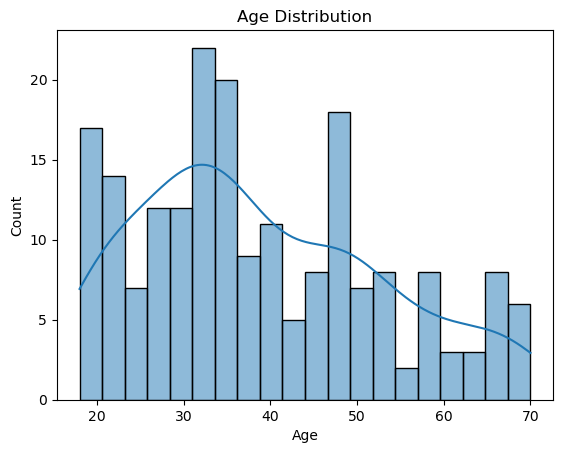

In [14]:
# Visualize distributions
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Feature Selection and Scaling

What it does: This selects relevant features for clustering and scales them to have a mean of 0 and a standard deviation of 1.

Why it’s important: Scaling ensures that all features contribute equally to the clustering process, avoiding bias toward features with larger values.

In [17]:
from sklearn.preprocessing import StandardScaler

# Select features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
print(X_scaled.head())

        Age  Annual Income  Spending Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980


Elbow Method for Optimal Clusters

What it does: This uses the Elbow Method to determine the optimal number of clusters by plotting the inertia (sum of squared distances to the nearest cluster center) for different values of k.

Why it’s important: It helps you choose the right number of clusters for your data.

C:\Users\Royal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Royal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Royal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Royal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

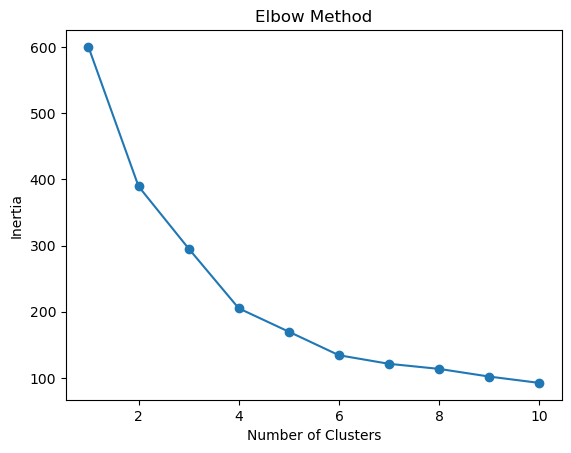

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Applying K-Means Clustering

What it does: This applies the K-Means clustering algorithm to the scaled data and assigns each customer to a cluster. It then visualizes the clusters using a scatter plot.

Why it’s important: Clustering helps you group similar customers together, which can be used for targeted marketing and other business strategies.

C:\Users\Royal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


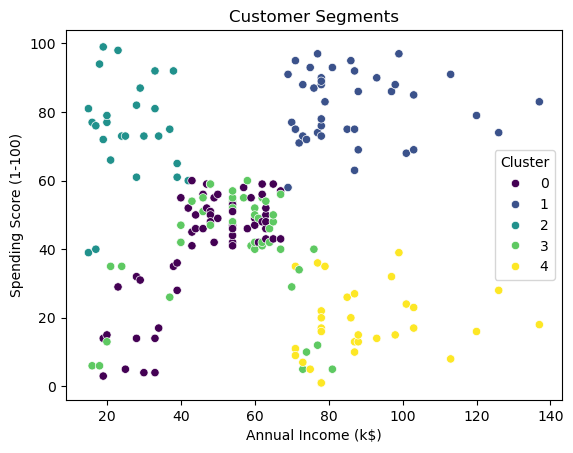

In [23]:
# Apply K-Means with optimal number of clusters (let's assume k=5 based on the plot)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (e.g., using Annual Income vs Spending Score)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()

Analyzing Clusters

We’ll analyze the characteristics of each cluster to understand what makes them unique. This will help us provide actionable recommendations to the marketing team.

Tasks:

Calculate the mean values of key features (Age, Annual Income, Spending Score) for each cluster.

Interpret the clusters (e.g., "High-income, low-spending customers").

Identify potential strategies for each cluster.

In [26]:
# Calculate mean values for each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

print(cluster_summary)

# Interpret clusters
cluster_summary['Segment'] = [
    "Young, Low Income, High Spending",  # Example interpretation for Cluster 0
    "Middle-aged, Medium Income, Medium Spending",  # Example interpretation for Cluster 1
    "Young, High Income, High Spending",  # Example interpretation for Cluster 2
    "Middle-aged, High Income, Low Spending",  # Example interpretation for Cluster 3
    "Old, Low Income, Low Spending"  # Example interpretation for Cluster 4
]

print(cluster_summary)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        0  55.275862           47.620690               41.706897
1        1  32.875000           86.100000               81.525000
2        2  25.769231           26.115385               74.846154
3        3  26.733333           54.311111               40.911111
4        4  44.387097           89.774194               18.483871
   Cluster        Age  Annual Income (k$)  Spending Score (1-100)  \
0        0  55.275862           47.620690               41.706897   
1        1  32.875000           86.100000               81.525000   
2        2  25.769231           26.115385               74.846154   
3        3  26.733333           54.311111               40.911111   
4        4  44.387097           89.774194               18.483871   

                                       Segment  
0             Young, Low Income, High Spending  
1  Middle-aged, Medium Income, Medium Spending  
2            Young, High Income, High Spen

Step 6: Visualizing Cluster Profiles

Let’s create visualizations to better understand the clusters.

Tasks:

Create bar plots or box plots to compare the characteristics of each cluster.

Use pair plots to visualize relationships between features for each cluster.

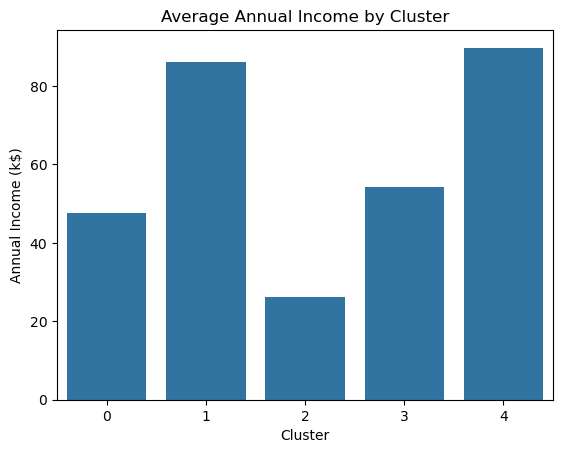

In [32]:
# Bar plot for average annual income by cluster
sns.barplot(data=cluster_summary, x='Cluster', y='Annual Income (k$)')
plt.title('Average Annual Income by Cluster')
plt.show()

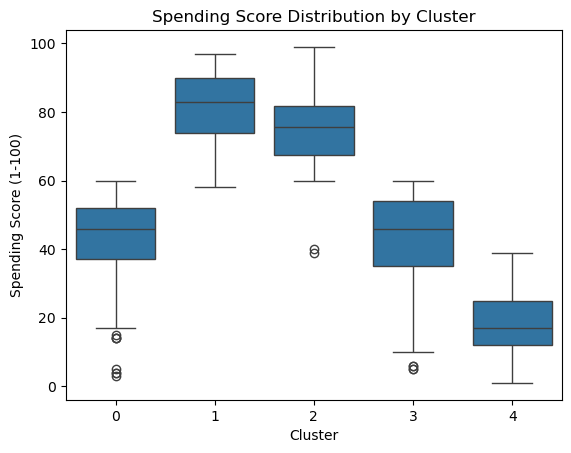

In [34]:
# Box plot for spending score by cluster
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Cluster')
plt.show()

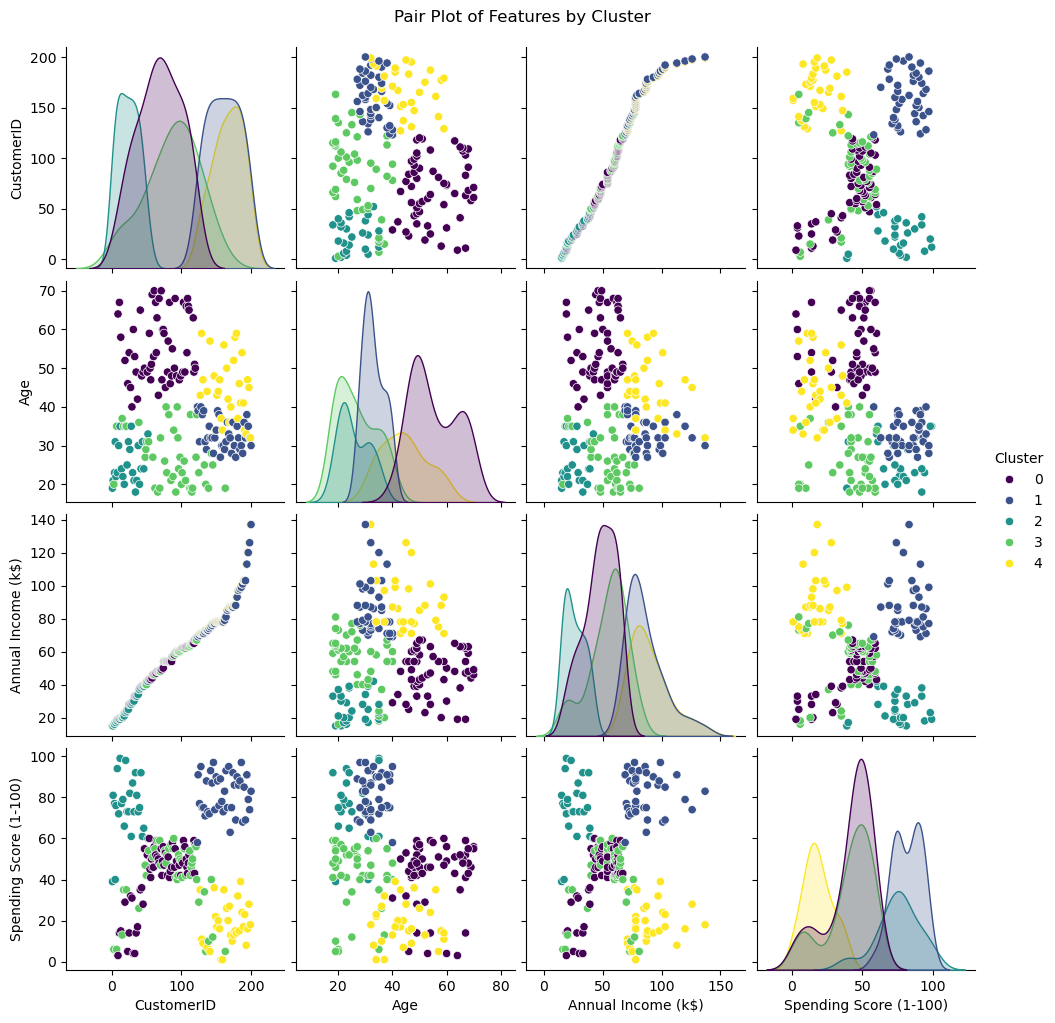

In [36]:
# Pair plot to visualize relationships between features
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Features by Cluster', y=1.02)
plt.show()